# Random Forest

## LOAD DATA IN PANDAS, CHECKING MISSING VALUES AND APPLY DIAGNOSTICS 

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_data = pd.read_csv("C:/Users/user/Desktop/titanic/test.csv")
train_data=pd.read_csv("C:/Users/user/Desktop/titanic/train.csv")
full_data = train_data.append(test_data, ignore_index=True)
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
outcomes = full_data['Survived']
all_features = full_data.drop('Survived', axis = 1)
print ("The percentage of survived passengers: {:.2f}%".format(100*outcomes.mean()))

The percentage of survived passengers: 38.38%


In [4]:
train_data.describe()# to see missing values from the count such as Age

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


cols = ['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch','fare']
titanic[cols].fillna(titanic[cols].mean(), inplace=True)

### Different count values shows there are some missing values and it should be imputed such as by mean

In [5]:
train_data["Age"].fillna(train_data.Age.mean(),inplace=True)


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# GETTING EARLY GENERALIZED PREDICTION:-TESTING WITH NUMERICAL VARIABLES 

In [7]:
y= train_data.pop('Survived')
x= train_data[['Pclass', 'Age', 'SibSp', 'Parch','Fare']]

In [8]:
np.isnan(x).any()

Pclass    False
Age       False
SibSp     False
Parch     False
Fare      False
dtype: bool

In [9]:
# just the numeric variables
numeric_varables= list(x.dtypes[x.dtypes !="object"].index)
x[numeric_varables].head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [10]:
from sklearn.ensemble import RandomForestClassifier
rc= RandomForestClassifier(n_estimators= 100, random_state=42, oob_score= True)
rc.fit(x[numeric_varables],y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [11]:
rc.oob_score_


0.7003367003367004

  ### I used RandomForestRegressor as it is  numerical variable

In [12]:
rc1=RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
rc1.fit(x[numeric_varables],y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [13]:
rc1.oob_score_

0.06921312163490756

In [14]:
y_oob=rc1.oob_prediction_
y_oob[1:10] # where every value of the array is a prediction/ the probablity of each individual survivial

array([0.5862069 , 0.09302326, 0.73684211, 0.03333333, 0.        ,
       0.5       , 0.17647059, 0.83333333, 0.58536585])

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_oob)

0.7262593338233259

## Another benchmark generalized prediction using dummiesclassifyer

In [16]:
Y= full_data['Survived']
X= full_data.drop('Survived', axis = 1)
print ("The percentage of survived passengers: {:.2f}%".format(100*y.mean()))

The percentage of survived passengers: 38.38%


In [17]:
X_dummies=pd.get_dummies(X,columns=['Pclass','Sex','Embarked'])
X_dummies.head(n=5)

,Age,Cabin,Fare,Name,Parch,PassengerId,SibSp,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,1,A/5 21171,0,0,1,0,1,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,PC 17599,1,0,0,1,0,1,0,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,0,STON/O2. 3101282,0,0,1,1,0,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,113803,1,0,0,1,0,0,0,1
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,0,373450,0,0,1,0,1,0,0,1


In [18]:
X_dummies.describe()

,Age,Fare,Parch,PassengerId,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,0.498854,0.246753,0.211612,0.541635,0.355997,0.644003,0.206264,0.093965,0.698243
std,14.413493,51.758668,0.865560,378.020061,1.041658,0.431287,0.408607,0.498454,0.478997,0.478997,0.404777,0.291891,0.459196
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,39.000000,31.275000,0.000000,982.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# i dropped some columns, which the information doesnt give relevance for prediction
col= ['Name','Ticket','PassengerId','Cabin']
xx=X_dummies.drop(col, axis=1)
xx.shape

(1309, 12)

In [20]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion, make_pipeline
imp = Imputer(strategy="most_frequent")
print(imp.fit_transform(xx)) 

[[22.      7.25    0.     ...  0.      0.      1.    ]
 [38.     71.2833  0.     ...  1.      0.      0.    ]
 [26.      7.925   0.     ...  0.      0.      1.    ]
 ...
 [38.5     7.25    0.     ...  0.      0.      1.    ]
 [24.      8.05    0.     ...  0.      0.      1.    ]
 [24.     22.3583  1.     ...  1.      0.      0.    ]]


In [21]:
np.isnan(xx).any()

Age            True
Fare           True
Parch         False
SibSp         False
Pclass_1      False
Pclass_2      False
Pclass_3      False
Sex_female    False
Sex_male      False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [22]:
xx["Age"].fillna(xx['Age'].mean(),inplace=True)
xx["Fare"].fillna(xx['Fare'].mean(),inplace=True) 

In [23]:
np.isnan(xx).any()

Age           False
Fare          False
Parch         False
SibSp         False
Pclass_1      False
Pclass_2      False
Pclass_3      False
Sex_female    False
Sex_male      False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [31]:
from sklearn.cross_validation import train_test_split
xx_train, xx_test, y_train, y_test = train_test_split(xx, y, test_size=.25)

In [32]:
#I use the cross validation - train_test_split, the shape of the data changed from 97
print(xx_train.shape, y_train.shape)

(750, 4) (750,)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

In [34]:
xx, y= make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)

In [35]:
model= RandomForestRegressor(100,oob_score=True,n_jobs=1,random_state=42)
model.fit(xx_train,y_train,sample_weight=None)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [36]:
print(model.feature_importances_)
print(model.predict([[0, 0, 0, 0]]))

[0.07931519 0.86704834 0.02630753 0.02732894]
[1.]


In [37]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# Determine the false positive and true positive rates
forest= RandomForestClassifier()
forest.fit(xx_train, y_train)
fpr, tpr, _ = roc_curve(y_test, forest.predict_proba(xx_test)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

ROC AUC: 0.98


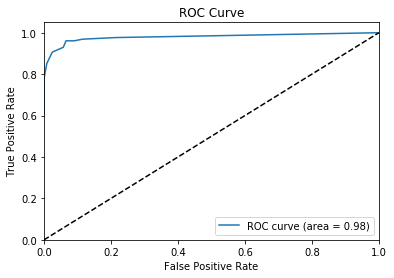

In [38]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
model= RandomForestRegressor(100,oob_score=True,n_jobs=-1,random_state=0)
model.fit(xx_train,y_train)
print( "ROC_AUC:",roc_auc_score(y_train,model.oob_prediction_))

ROC_AUC: 0.9826712952424312


In [40]:
model.oob_score_

0.8420871611789343

In [41]:
from sklearn.dummy import DummyClassifier
clf= DummyClassifier ()
clf.fit(xx_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [42]:
# prediction accuracy from DummyClassifier/ which is reseanable to consider the model >0.5
print( "prediction accuracy:%f" 
      % clf.score(xx_test,y_test))

prediction accuracy:0.484000


# PARAMETER TESTS -TO MAKE THE MODEL BETTER

## 1. n_estimators

30 trees
ROC_AUC: 0.976158803778739

50 trees
ROC_AUC: 0.9782253016162077

100 trees
ROC_AUC: 0.9799467903482814

200 trees
ROC_AUC: 0.980843102663328

500 trees
ROC_AUC: 0.9819421522877305

1000 trees
ROC_AUC: 0.9813730651035739

1500 trees
ROC_AUC: 0.9814833257455042

2000 trees
ROC_AUC: 0.981355281129069



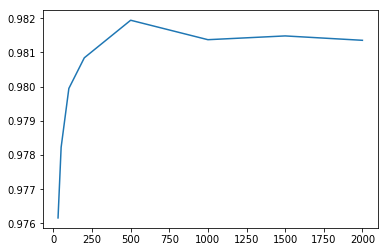

In [43]:
results=[]
n_estimator_options=[30,50,100,200,500,1000,1500,2000]
for trees in n_estimator_options:
    model=RandomForestRegressor(trees,oob_score=True, n_jobs=-1, random_state= 42)
    model.fit(xx_train,y_train)
    print (trees, "trees")
    roc=roc_auc_score(y_train, model.oob_prediction_)
    print ("ROC_AUC:",roc)
    results.append(roc)
    print ("")
pd.Series(results,n_estimator_options).plot()

# 2. max_features

auto option
ROC_AUC: 0.9818283348508992

None option
ROC_AUC: 0.9818283348508992

sqrt option
ROC_AUC: 0.9815188936945141

log2 option
ROC_AUC: 0.9815188936945141

0.95 option
ROC_AUC: 0.981543791258821

0.9 option
ROC_AUC: 0.981543791258821

0.2 option
ROC_AUC: 0.9796337923969951



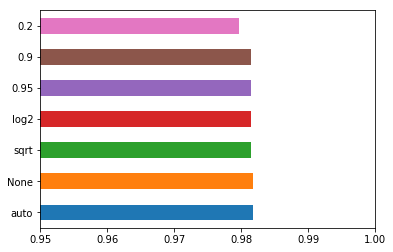

In [44]:
results=[]
max_features_options=['auto',None,'sqrt','log2',0.95,0.9,0.2]
for max_features in max_features_options:
    model=RandomForestRegressor(n_estimators=600,oob_score=True, n_jobs=-1, random_state= 42,max_features=max_features)
    model.fit(xx_train,y_train)
    print (max_features, "option")
    roc=roc_auc_score(y_train, model.oob_prediction_)
    print ("ROC_AUC:",roc)
    results.append(roc)
    print ("")
pd.Series(results,max_features_options).plot(kind='barh',xlim=(.95,1))

# 3. min_sample_leaf

5 min_samples
ROC_AUC: 0.9822978317778285

10 min_samples
ROC_AUC: 0.9825503642157979

15 min_samples
ROC_AUC: 0.9821448895970863

20 min_samples
ROC_AUC: 0.9817536421579787

25 min_samples
ROC_AUC: 0.9815544616435238

30 min_samples
ROC_AUC: 0.981163214204416

40 min_samples
ROC_AUC: 0.9807221716366947



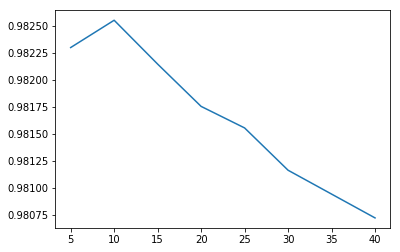

In [45]:
results=[]
min_sample_leaf_options= [5,10,15,20,25,30,40]
for min_samples in min_sample_leaf_options:
    model=RandomForestRegressor(n_estimators=500,oob_score=True, n_jobs=-1, random_state= 42,max_features="sqrt",min_samples_leaf=min_samples)
    model.fit(xx_train,y_train)
    print (min_samples, "min_samples")
    roc=roc_auc_score(y_train, model.oob_prediction_)
    print ("ROC_AUC:",roc)
    results.append(roc)
    print ("")
pd.Series(results,min_sample_leaf_options).plot()

# n_jobs

In [46]:
%%timeit
model=RandomForestRegressor(n_estimators=500,oob_score=True, n_jobs=1, random_state= 42,max_features="sqrt",min_samples_leaf=10)
model.fit(xx_train,y_train)   

1.16 s ± 79.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%%timeit
model=RandomForestRegressor(n_estimators=500,oob_score=True, n_jobs=-1, random_state= 42,max_features="sqrt",min_samples_leaf=10)
model.fit(xx_train,y_train)


1.12 s ± 86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 4.min_samples _split

0.1 min_samples
ROC_AUC: 0.9809711472797633

0.2 min_samples
ROC_AUC: 0.9809142385613475

0.3 min_samples
ROC_AUC: 0.980508763942636

0.5 min_samples
ROC_AUC: 0.9666016958798089

0.7 min_samples
ROC_AUC: 0.1977080013658092

0.9 min_samples
ROC_AUC: 0.1977080013658092

0.99 min_samples
ROC_AUC: 0.1977080013658092



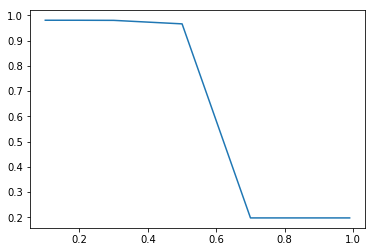

In [48]:
results=[]
min_samples_split_options= [.1,.2,.3,.5,.7,.9,.99]
for min_samples in min_samples_split_options:
    model=RandomForestRegressor(n_estimators=500,oob_score=True, n_jobs=1, random_state= 42,max_features="sqrt",min_samples_leaf=10, min_samples_split=min_samples)
    model.fit(xx_train,y_train)
    print (min_samples, "min_samples")
    roc=roc_auc_score(y_train, model.oob_prediction_)
    print ("ROC_AUC:",roc)
    results.append(roc)
    print ("")
pd.Series(results,min_samples_split_options).plot()

# Final Model

In [49]:
model=RandomForestRegressor(n_estimators=600,oob_score=True, n_jobs=1, random_state= 42,max_features="sqrt",min_samples_leaf=10, min_samples_split=.1)
model.fit(xx_train,y_train)
roc=roc_auc_score(y_train, model.oob_prediction_)
print ("ROC_AUC:",roc)

ROC_AUC: 0.9811489870248122


# Conclusion
This supervised machine learning excersise gives a special importance because it gives predictions based on past experiance. 

There are several natural ideas for applying Random Forest the supervised learning.

1. it provide both predictin of classification for catagorical vaiables as well as regression fornumerical variables
2. the pridiction model that has a tunned model is far better than the initial bench mark model
It is important to assess impact of passangers class and I will explore further

